In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [73]:
df.sample()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
22897       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
22897        0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784  label  
22897         0         0         0         0      0  

[1 rows x 785 columns]

In [74]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# The data (features) are in mnist.data
X = mnist.data

# The target (labels) are in mnist.target
y = mnist.target

In [75]:
df = pd.DataFrame(X)
df['label'] = y

In [76]:
df.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  label  
0         0         0         0      5  
1         0         0         0      0  
2         0         0         0      4  
3         0         0         0      1  
4         0         0         0      9  

[5 rows x 785 columns]

In [77]:
df.shape

(70000, 785)

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


In [28]:
# Implementing the PCA
scaler = StandardScaler()

In [30]:
# Transforming in 3D
pca = PCA(n_components= 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
X_train_trf

array([[ 125.46825605,  549.15243228,  184.22339107],
       [-191.88874964, -662.43033831, -633.04271703],
       [-202.987086  , -183.98577989,  605.52114378],
       ...,
       [-977.7805344 ,  370.48362976,  -19.73584681],
       [1224.72625446,  398.33662586, -779.38012294],
       [ 797.1006352 , 1053.38789873, -822.78532714]], shape=(56000, 3))

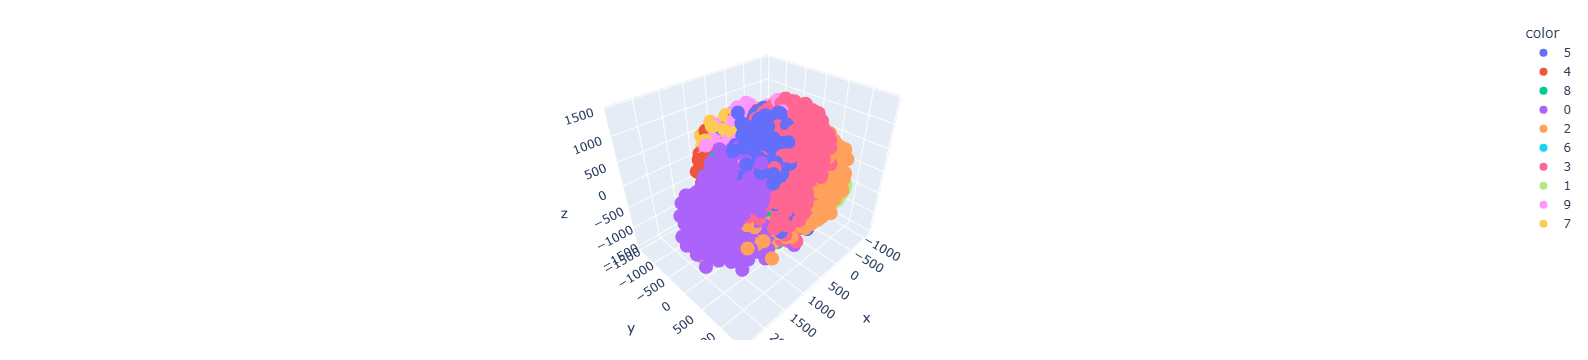

In [32]:
#Visualizing in 3D plot
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x=X_train_trf[:,0] , y= X_train_trf[:,1] , z=X_train_trf[:,2],
                   color = y_train_trf)
fig.update_layout(
    margin = dict(l = 20 , r = 20 , t=20 , b = 20)
)
fig.show()

In [ ]:
# Finding the Accuracy Score without PCA

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
import time
start = time.time()
y_pred = knn.predict(X_test)
print('Time Taken to train',time.time() - start)
accuracy_score(y_test , y_pred)

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



Time Taken to train 25.744858264923096


0.8185714285714286

In [68]:
# Implementing PCA

# Stp1 : Centering Mean
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but PCA was fitted without feature names



In [48]:
pca = PCA(n_components = 300 )

In [49]:
X_train_trf .shape

(56000, 300)

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train_trf ,y_train )

KNeighborsClassifier()

In [52]:
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test , y_pred)

0.8191428571428572

In [ ]:
for i in range(1, 785):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf ,y_train )
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test , y_pred))
    

Two main Goal of PCA :
1. Transform from higher Dimensional features into Lower Dimensional features
2. Used For Visualization

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but PCA was fitted without feature names



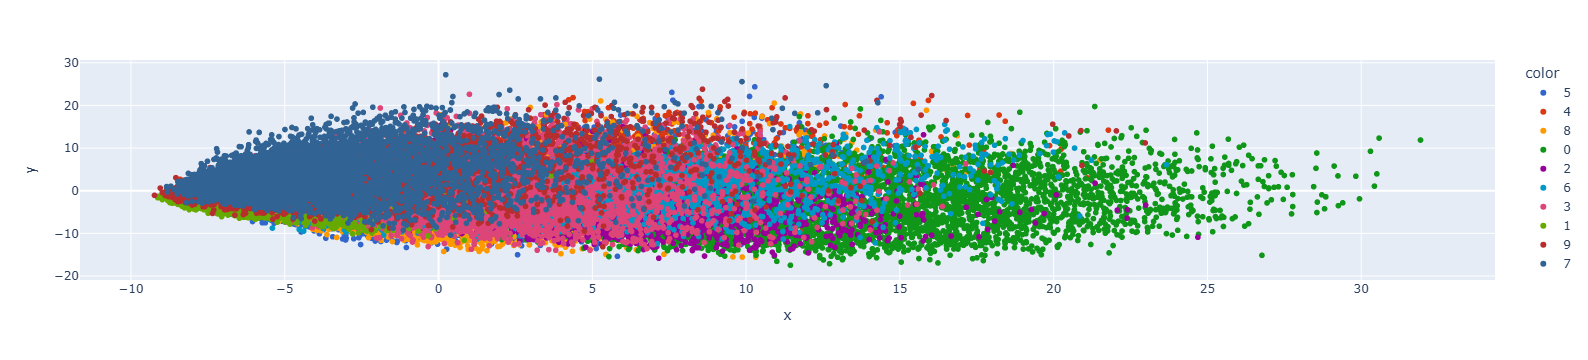

In [53]:

# Transforming to a 2D coordinate system
pca = PCA(n_components =2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                y=X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but PCA was fitted without feature names



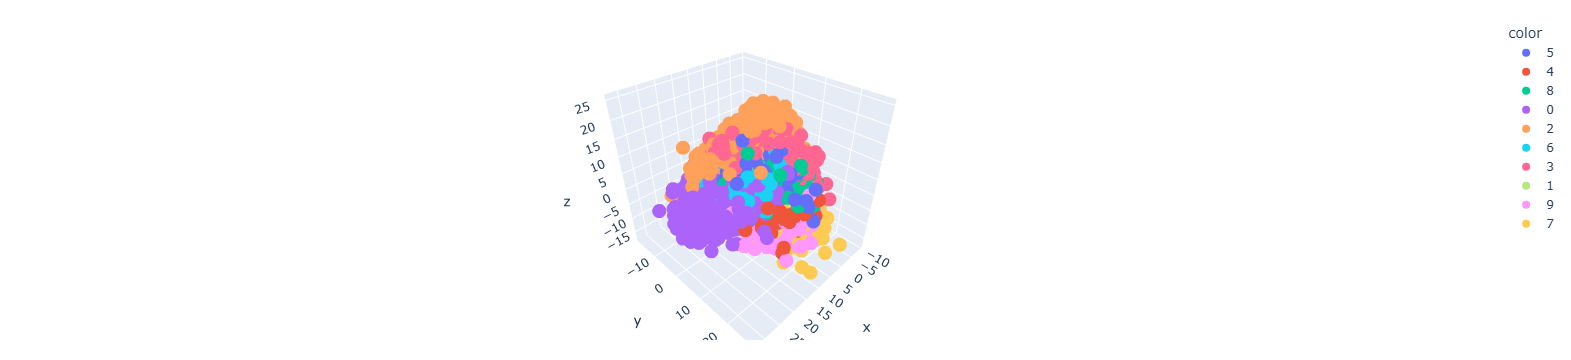

In [54]:
# Transforming in 3D
pca = PCA(n_components= 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x=X_train_trf[:,0] , y= X_train_trf[:,1] , z=X_train_trf[:,2],
                   color = y_train_trf)
fig.update_layout(
    margin = dict(l = 20 , r = 20 , t=20 , b = 20)
)
fig.show()

In [78]:
pca = PCA(n_components= None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but PCA was fitted without feature names



In [79]:
pca.explained_variance_  # Eigen values

array([4.06329685e+01, 2.90131130e+01, 2.69184954e+01, 2.08204608e+01,
       1.81047848e+01, 1.57326502e+01, 1.37110164e+01, 1.25767117e+01,
       1.09673422e+01, 9.98327406e+00, 9.64372760e+00, 8.66448165e+00,
       8.02352594e+00, 7.86992108e+00, 7.38586112e+00, 7.14236306e+00,
       6.71482726e+00, 6.60258730e+00, 6.39395015e+00, 6.18539372e+00,
       5.88793733e+00, 5.73425833e+00, 5.49363001e+00, 5.33345357e+00,
       5.13514538e+00, 4.95219620e+00, 4.86142617e+00, 4.72608121e+00,
       4.52575460e+00, 4.38120182e+00, 4.30904070e+00, 4.22509567e+00,
       4.06353019e+00, 4.00356114e+00, 3.97287235e+00, 3.84791796e+00,
       3.76694887e+00, 3.72516569e+00, 3.67092606e+00, 3.46663279e+00,
       3.42539134e+00, 3.35279266e+00, 3.28098453e+00, 3.25424477e+00,
       3.20398211e+00, 3.15037877e+00, 3.13650937e+00, 3.08985897e+00,
       3.04834302e+00, 2.99534450e+00, 2.94679394e+00, 2.88416279e+00,
       2.86139985e+00, 2.82899038e+00, 2.79148406e+00, 2.68463820e+00,
      

In [80]:
pca.explained_variance_  # Eigen values

array([4.06329685e+01, 2.90131130e+01, 2.69184954e+01, 2.08204608e+01,
       1.81047848e+01, 1.57326502e+01, 1.37110164e+01, 1.25767117e+01,
       1.09673422e+01, 9.98327406e+00, 9.64372760e+00, 8.66448165e+00,
       8.02352594e+00, 7.86992108e+00, 7.38586112e+00, 7.14236306e+00,
       6.71482726e+00, 6.60258730e+00, 6.39395015e+00, 6.18539372e+00,
       5.88793733e+00, 5.73425833e+00, 5.49363001e+00, 5.33345357e+00,
       5.13514538e+00, 4.95219620e+00, 4.86142617e+00, 4.72608121e+00,
       4.52575460e+00, 4.38120182e+00, 4.30904070e+00, 4.22509567e+00,
       4.06353019e+00, 4.00356114e+00, 3.97287235e+00, 3.84791796e+00,
       3.76694887e+00, 3.72516569e+00, 3.67092606e+00, 3.46663279e+00,
       3.42539134e+00, 3.35279266e+00, 3.28098453e+00, 3.25424477e+00,
       3.20398211e+00, 3.15037877e+00, 3.13650937e+00, 3.08985897e+00,
       3.04834302e+00, 2.99534450e+00, 2.94679394e+00, 2.88416279e+00,
       2.86139985e+00, 2.82899038e+00, 2.79148406e+00, 2.68463820e+00,
      

In [81]:
pca.components_  # Eigen Vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(784, 784))

In [82]:
pca.components_.shape

(784, 784)

In [83]:
pca.explained_variance_.shape  # This tells each eigne values how much they explain the dataset


(784,)

In [84]:
# So calculating it in percentage we use the explained_variance_ratio * 100
# Minimum no PC required to explain the variance of around 90 percent is :
pca.explained_variance_ratio_

array([5.67489426e-02, 4.05203840e-02, 3.75949926e-02, 2.90783366e-02,
       2.52855608e-02, 2.19725828e-02, 1.91491223e-02, 1.75649262e-02,
       1.53172435e-02, 1.39428712e-02, 1.34686528e-02, 1.21010153e-02,
       1.12058417e-02, 1.09913136e-02, 1.03152643e-02, 9.97518927e-03,
       9.37808290e-03, 9.22132597e-03, 8.92993851e-03, 8.63866379e-03,
       8.22322932e-03, 8.00859767e-03, 7.67253059e-03, 7.44882449e-03,
       7.17186269e-03, 6.91635163e-03, 6.78958010e-03, 6.60055422e-03,
       6.32077343e-03, 6.11888769e-03, 6.01810580e-03, 5.90086624e-03,
       5.67522015e-03, 5.59146598e-03, 5.54860532e-03, 5.37409113e-03,
       5.26100783e-03, 5.20265248e-03, 5.12690015e-03, 4.84157945e-03,
       4.78398069e-03, 4.68258769e-03, 4.58229880e-03, 4.54495343e-03,
       4.47475544e-03, 4.39989178e-03, 4.38052146e-03, 4.31536843e-03,
       4.25738630e-03, 4.18336733e-03, 4.11556050e-03, 4.02808839e-03,
       3.99629714e-03, 3.95103333e-03, 3.89865113e-03, 3.74942773e-03,
      

In [85]:
# Calculating the cummulatative sum 
np.cumsum(pca.explained_variance_ratio_)

array([0.05674894, 0.09726933, 0.13486432, 0.16394266, 0.18922822,
       0.2112008 , 0.23034992, 0.24791485, 0.26323209, 0.27717496,
       0.29064362, 0.30274463, 0.31395047, 0.32494179, 0.33525705,
       0.34523224, 0.35461032, 0.36383165, 0.37276159, 0.38140025,
       0.38962348, 0.39763208, 0.40530461, 0.41275343, 0.4199253 ,
       0.42684165, 0.43363123, 0.44023178, 0.44655255, 0.45267144,
       0.45868955, 0.46459041, 0.47026563, 0.4758571 , 0.48140571,
       0.4867798 , 0.4920408 , 0.49724346, 0.50237036, 0.50721194,
       0.51199592, 0.51667851, 0.5212608 , 0.52580576, 0.53028051,
       0.5346804 , 0.53906093, 0.54337629, 0.54763368, 0.55181705,
       0.55593261, 0.5599607 , 0.56395699, 0.56790803, 0.57180668,
       0.57555611, 0.57927153, 0.58297237, 0.58659865, 0.59018836,
       0.59372061, 0.59720922, 0.60065098, 0.60407883, 0.6074625 ,
       0.61078319, 0.61407195, 0.61730706, 0.62049057, 0.62365472,
       0.62677964, 0.62988218, 0.6329545 , 0.63598082, 0.63897

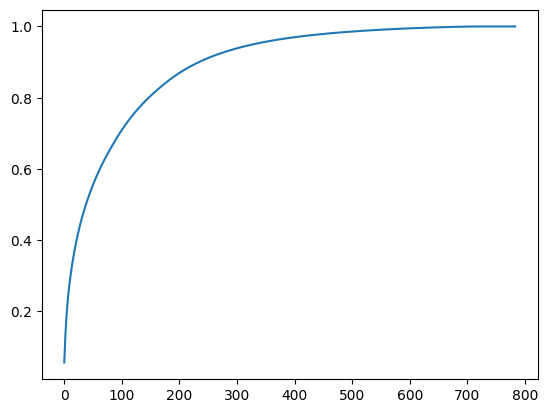

In [86]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [87]:
#  We always explaint the 90 % of variance to explain our dataset 
# In the Above graph we can clearly see that around 200 PCA components we can explain the 90  percent of variance of the dataset